In [1]:
library(ggplot2)
library(plyr)
#load("C:/Users/6609/Documents/data.rData")

In [4]:
Sample <- read.csv("data/Sample.csv")

In [5]:
str(Sample)

'data.frame':	9426 obs. of  24 variables:
 $ Row.ID              : int  18606 20847 23086 23087 23088 23597 25549 20228 19483 24782 ...
 $ Order.Priority      : Factor w/ 6 levels "Critical","Critical ",..: 6 3 6 6 6 5 4 6 4 3 ...
 $ Discount            : num  0.01 0.01 0.03 0.01 0 0.09 0.08 0.02 0.08 0.01 ...
 $ Unit.Price          : num  2.88 2.84 6.68 5.68 205.99 ...
 $ Shipping.Cost       : num  0.5 0.93 6.15 3.6 2.5 14.3 26.3 26 6.81 0.99 ...
 $ Customer.ID         : int  2 3 3 3 3 3 3 5 5 6 ...
 $ Customer.Name       : Factor w/ 2703 levels "Aaron Davies Bruce",..: 1140 264 264 264 264 264 264 2234 2234 634 ...
 $ Ship.Mode           : Factor w/ 3 levels "Delivery Truck",..: 3 2 2 3 2 2 1 1 3 3 ...
 $ Customer.Segment    : Factor w/ 4 levels "Consumer","Corporate",..: 2 2 2 2 2 2 2 3 3 3 ...
 $ Product.Category    : Factor w/ 3 levels "Furniture","Office Supplies",..: 2 2 2 2 3 2 3 1 2 2 ...
 $ Product.Sub.Category: Factor w/ 17 levels "Appliances","Binders and Binder Accessories

In [8]:
## class(order.date) = factor, need to transform to date
sample_data <- as.Date(Sample$Order.Date)
## as.POSIXlt(sample_data) POSIXlt format
year_p <- as.POSIXlt(sample_data)
attributes(year_p)

$names
[1] "sec"   "min"   "hour"  "mday"  "mon"   "year"  "wday"  "yday"  "isdst"

$class
[1] "POSIXlt" "POSIXt" 

$tzone
[1] "UTC"

In [9]:
head(year_p)

[1] "2012-05-28 UTC" "2010-07-07 UTC" "2011-07-27 UTC" "2011-07-27 UTC"
[5] "2011-07-27 UTC" "2011-11-09 UTC"

In [10]:
head(year_p$year)

[1] 112 110 111 111 111 111

In [11]:
## extraction year & month
year <- year_p$year + 1900
month <- year_p$mon + 1

In [12]:
Sample <- cbind(Sample,year,month)

In [13]:
#ddply to get sum(sales) per month
line_chart_data  <- ddply(Sample,c("year","month"),function(df) sum(df$Sales))

In [16]:
head(line_chart_data,5)

year,month,V1
2010,1,139730.46
2010,2,130534.07
2010,3,145615.73
2010,4,130542.99
2010,5,93938.81


In [17]:
colnames(line_chart_data) <- c("Year","Month","Sum(Sales)")

In [18]:
#2010
p1 <- ggplot(line_chart_data[1:12,],aes(x=Month,y=`Sum(Sales)`))+ geom_line(
    ) +  scale_x_continuous(breaks=seq(1, 12, 1)) + scale_y_continuous(
    limits=c(0, max(line_chart_data$`Sum(Sales)`)),breaks=seq(0, max(line_chart_data$`Sum(Sales)`), 100000)) + ggtitle("2010") 

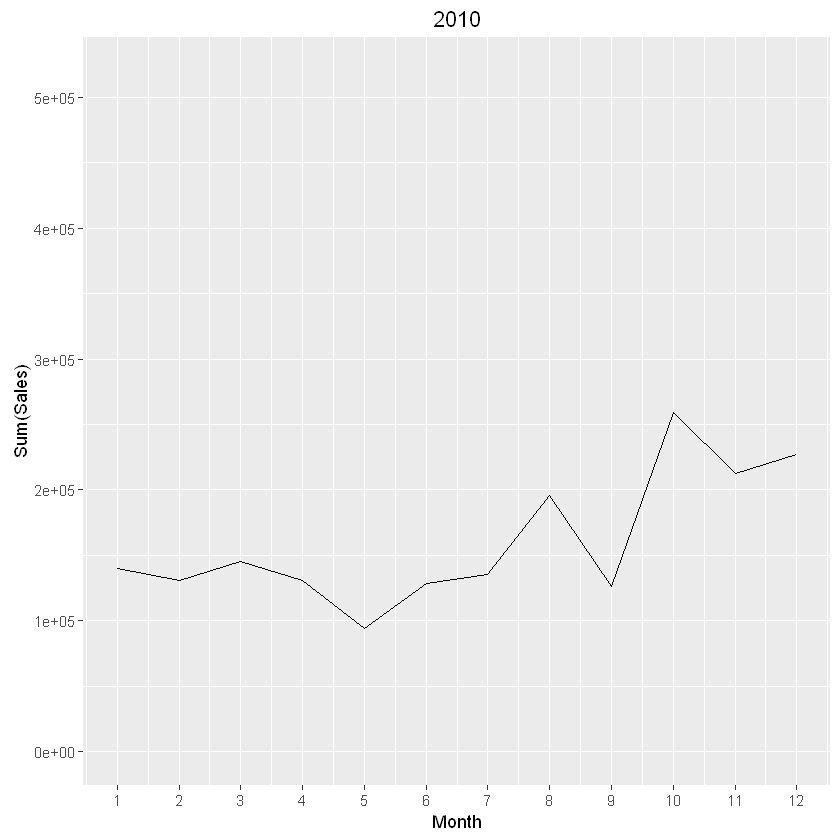

In [19]:
p1

In [20]:
#2011/2012/2013
p2 <- ggplot(line_chart_data[13:24,],aes(x=Month,y=`Sum(Sales)`))+ geom_line(
    ) +  scale_x_continuous(breaks=seq(1, 12, 1)) + scale_y_continuous(
    limits=c(0, max(line_chart_data$`Sum(Sales)`)),breaks=seq(0, max(line_chart_data$`Sum(Sales)`), 100000))+ggtitle("2011")

p3 <- ggplot(line_chart_data[25:36,],aes(x=Month,y=`Sum(Sales)`))+ geom_line(
    ) +  scale_x_continuous(breaks=seq(1, 12, 1)) + scale_y_continuous(
    limits=c(0, max(line_chart_data$`Sum(Sales)`)),breaks=seq(0, max(line_chart_data$`Sum(Sales)`), 100000))+ggtitle("2012")

p4 <- ggplot(line_chart_data[37:48,],aes(x=Month,y=`Sum(Sales)`))+ geom_line(
    ) +  scale_x_continuous(breaks=seq(1, 12, 1)) + scale_y_continuous(
    limits=c(0, max(line_chart_data$`Sum(Sales)`)),breaks=seq(0, max(line_chart_data$`Sum(Sales)`), 100000))+ggtitle("2013")

In [21]:
source("multiplot.R")

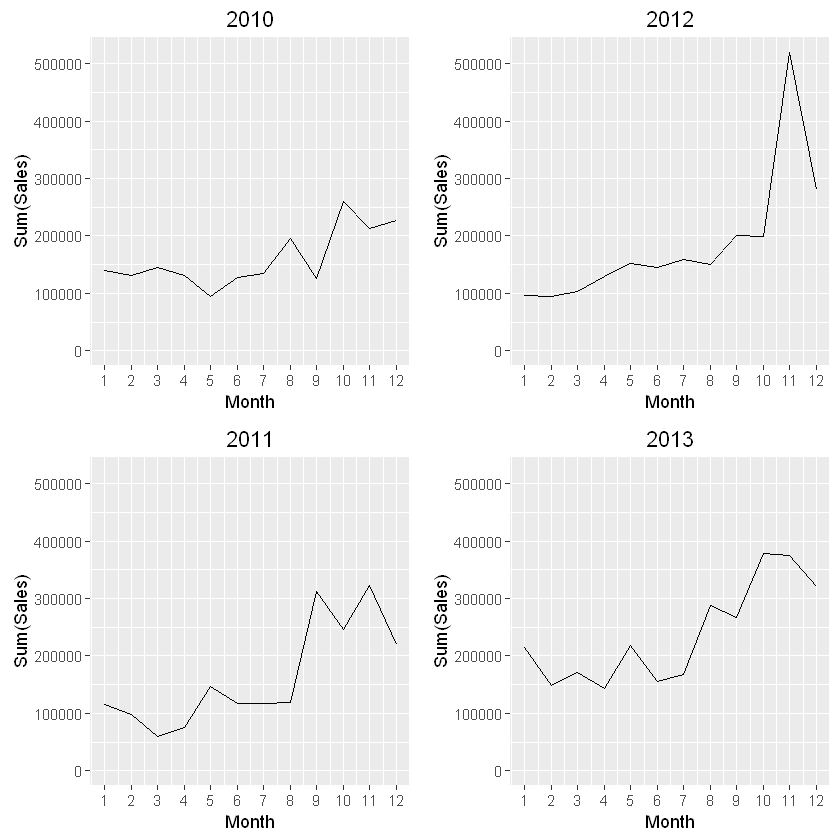

In [23]:
# options(scipen=999) set numeric from scientific notation
options(scipen=999)
multiplot(p1, p2, p3, p4, cols=2)